In [1]:
import numpy as np
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import adam_v2
from keras.layers import MaxPooling2D

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip -q "/content/drive/MyDrive/training/faces_expression_dataset_cleaned.zip" -d ""

In [7]:
#path = './CKplus dataset/'
path = '/content/dataset'

files = os.listdir(path)

files

['Happy', 'Neutral', 'Sad', '.ipynb_checkpoints']

In [8]:
fe = ['Happy', 'Neutral', 'Sad']

In [9]:
i = 0
last = []
images = []
labels = []

In [10]:
for fle in files[:-1]:
    idx = fe.index(fle)
    label = idx
  
    total = path + '/' + fle
    files_exp = os.listdir(total)
    
    for fle_2 in files_exp:
        file_main = total + '/' + fle_2
        #print(file_main + "   " + str(label))
        image = cv2.imread(file_main)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(100,100))
        images.append(image)
        labels.append(label)
        i+=1
    last.append(i)
    print(files[idx], "Done...........!")

#print("Done........!")

Happy Done...........!
Neutral Done...........!
Sad Done...........!


In [11]:
images_f = np.array(images)
labels_f = np.array(labels)

images_f_2 = images_f/255

In [12]:
num_of_classes = 3

In [13]:
labels_encoded = tf.keras.utils.to_categorical(labels_f, num_classes = num_of_classes)

labels_encoded[0]

array([1., 0., 0.], dtype=float32)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_encoded, test_size = 0.20, random_state=42)

In [15]:
X_train.shape

(2477, 100, 100, 3)

In [16]:
X_test.shape

(620, 100, 100, 3)

In [17]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
          
model.add(layers.Flatten())
model.add(layers.Dense(2304, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 28224)             0

In [19]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [20]:
history = model.fit(X_train,Y_train,batch_size=64,epochs=30,verbose=1,validation_data=(X_test, Y_test))

Epoch 1/30
39/39 [==============================] - 14s 103ms/step - loss: 1.6020 - accuracy: 0.6124 - val_loss: 0.5831 - val_accuracy: 0.7548
Epoch 2/30
39/39 [==============================] - 3s 82ms/step - loss: 0.4192 - accuracy: 0.8401 - val_loss: 0.4184 - val_accuracy: 0.8694
Epoch 3/30
39/39 [==============================] - 3s 81ms/step - loss: 0.2671 - accuracy: 0.9043 - val_loss: 0.3082 - val_accuracy: 0.8855
Epoch 4/30
39/39 [==============================] - 3s 77ms/step - loss: 0.1986 - accuracy: 0.9237 - val_loss: 0.2459 - val_accuracy: 0.9145
Epoch 5/30
39/39 [==============================] - 3s 80ms/step - loss: 0.1801 - accuracy: 0.9302 - val_loss: 0.1848 - val_accuracy: 0.9355
Epoch 6/30
39/39 [==============================] - 3s 81ms/step - loss: 0.1379 - accuracy: 0.9512 - val_loss: 0.2561 - val_accuracy: 0.9048
Epoch 7/30
39/39 [==============================] - 3s 82ms/step - loss: 0.1040 - accuracy: 0.9608 - val_loss: 0.1969 - val_accuracy: 0.9371
Epoch 8/30


In [21]:
import pickle

file = "LeNet-Facial-Expression-model-version-1"
fileobj = open(file, 'wb')
pickle.dump(model, fileobj)
print("model save as pickle successfully")

INFO:tensorflow:Assets written to: ram://608fa416-6dd0-4f9f-8946-eee3fe3cc94e/assets
model save as pickle successfully


In [32]:
import pickle

pickle.dump(model, open("LeNet-Facial-Expression-model-version-1.pkl", 'wb'))

print("model save as pickle successfully")

INFO:tensorflow:Assets written to: ram://fa4d141a-1e59-4cdd-a481-9425a3a9a3a8/assets
model save as pickle successfully


In [33]:
loaded_model = pickle.load(open("LeNet-Facial-Expression-model-version-1.pkl", 'rb'))

print("model loaded as pickle successfully")

model loaded as pickle successfully


In [35]:
loaded_model.predict(X_test)

array([[4.0093908e-04, 4.5124412e-01, 9.9993229e-01],
       [1.0000000e+00, 2.1090888e-07, 2.0540362e-02],
       [2.0739301e-03, 9.9993145e-01, 1.9815065e-01],
       ...,
       [1.0000000e+00, 1.3842921e-06, 8.8691832e-03],
       [9.1593470e-03, 2.6762637e-03, 9.9999893e-01],
       [9.9999988e-01, 1.7111280e-03, 5.2259903e-04]], dtype=float32)

In [ ]:
model_json = model.to_json()

with open("LeNet-Facial-Expression-model-version-4.json", "w") as json_file:
    json_file.write(model_json)
    model.save_weights("LeNet-Facial-Expression-model-version-4.h5")
    print("Saved model to disk")

Saved model to disk


In [41]:
loss_and_metrics = model.evaluate(X_test, Y_test)
print(loss_and_metrics)

20/20 [==============================] - 0s 21ms/step - loss: 0.2598 - accuracy: 0.9500
[0.2597743570804596, 0.949999988079071]


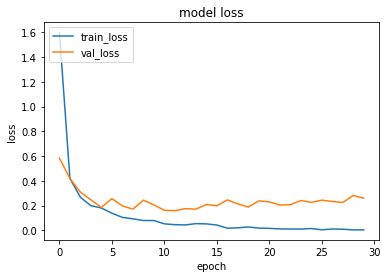

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

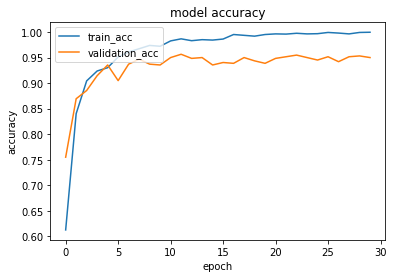

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'validation_acc'], loc='upper left')
plt.show()

In [39]:
Pred = model.predict(X_test)
Pred

array([[4.0093908e-04, 4.5124412e-01, 9.9993229e-01],
       [1.0000000e+00, 2.1090888e-07, 2.0540362e-02],
       [2.0739301e-03, 9.9993145e-01, 1.9815065e-01],
       ...,
       [1.0000000e+00, 1.3842921e-06, 8.8691832e-03],
       [9.1593470e-03, 2.6762637e-03, 9.9999893e-01],
       [9.9999988e-01, 1.7111280e-03, 5.2259903e-04]], dtype=float32)

In [40]:
i=0 
Y_test_l = [] 
Pred_l = []

while(i<len(Pred)):   
    Y_test_l.append(int(np.argmax(Y_test[i])))     
    Pred_l.append(int(np.argmax(Pred[i])))   
    i+=1

report = classification_report(Y_test_l, Pred_l)

print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       325
           1       0.88      0.89      0.88        82
           2       0.93      0.97      0.95       213

    accuracy                           0.95       620
   macro avg       0.93      0.94      0.93       620
weighted avg       0.95      0.95      0.95       620



<AxesSubplot:>

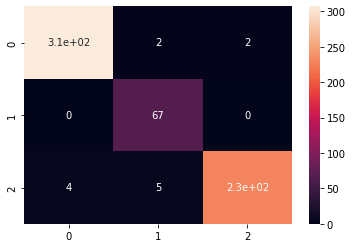

In [ ]:
results = confusion_matrix(Y_test_l, Pred_l)

import seaborn as sns

sns.heatmap(results, annot=True)

In [ ]:
from keras.models import model_from_json
from keras.models import Model, load_model

In [ ]:
# load json and create model
json_file = open('LeNet-Facial-Expression-model-version-4.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("LeNet-Facial-Expression-model-version-4.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 97.89%


In [42]:
def test_image(ind,images_f,images_f_2,Model):
    plt.matshow(images_f[ind])
    image_test = images_f_2[ind]
    print("Label actual:  " + fe[labels[ind]])
    pred_1 = loaded_model.predict(np.array([image_test]))
    #print(pred_1)
    pred_class = fe[int(np.argmax(pred_1))]
    print("Predicted Label: "+ pred_class)

Label actual:  Happy
Predicted Label: Sad


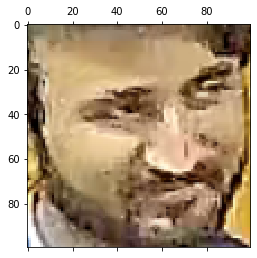

In [43]:
test_image(4, X_test, X_test, loaded_model)

Label actual:  Happy
Predicted Label: Happy


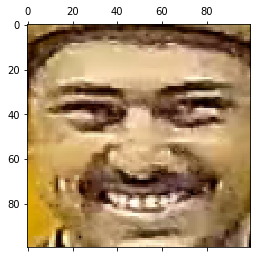

In [44]:
test_image(100, X_test, X_test, loaded_model)

Label actual:  Happy
Predicted Label: Happy


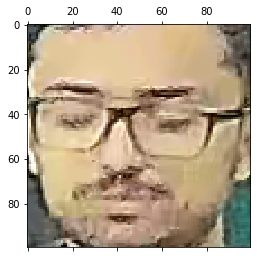

In [45]:
test_image(108, X_test, X_test, loaded_model)

Label actual:  Happy
Predicted Label: Sad


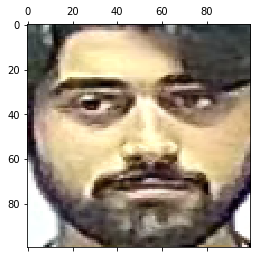

In [46]:
test_image(60, X_test, X_test, loaded_model)

Label actual:  Happy
Predicted Label: Happy


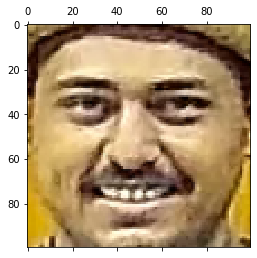

In [47]:
test_image(196, X_test, X_test, loaded_model)

Label actual:  Happy
Predicted Label: Happy


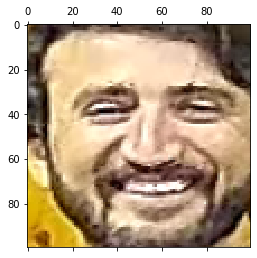

In [48]:
test_image(298, X_test, X_test, loaded_model)

Label actual:  Happy
Predicted Label: Happy


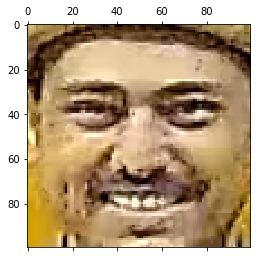

In [49]:
test_image(400, X_test, X_test, loaded_model)

Label actual:  Happy
Predicted Label: Sad


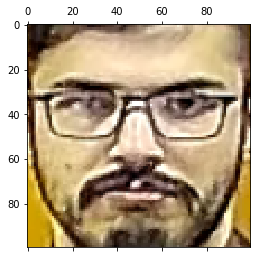

In [50]:
test_image(396, X_test, X_test, loaded_model)

Label actual:  Happy
Predicted Label: Happy


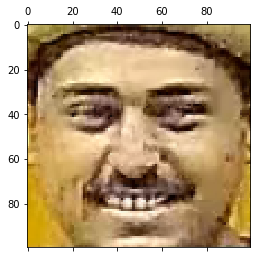

In [51]:
test_image(39, X_test, X_test, loaded_model)

Label actual:  Happy
Predicted Label: Sad


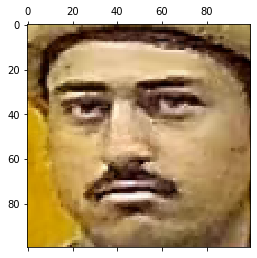

In [52]:
test_image(436, X_test, X_test, loaded_model)

Label actual:  Happy
Predicted Label: Happy


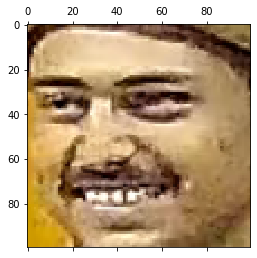

In [53]:
test_image(460, X_test, X_test, loaded_model)

Label actual:  Happy
Predicted Label: Neutral


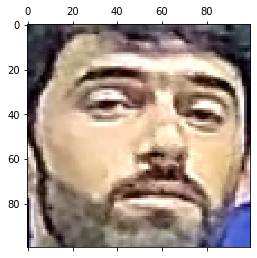

In [54]:
test_image(500, X_test, X_test, loaded_model)

Label actual:  Happy
Predicted Label: Happy


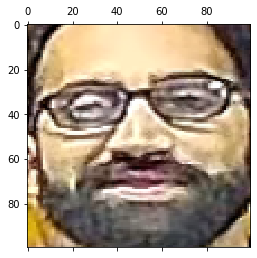

In [55]:
test_image(420, X_test, X_test, loaded_model)